In [1]:
!pip install tsfel

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsfel

from custom_code.utils import load_from_tsfile_to_dataframe


In [2]:
from tsfel.utils.add_personal_features import add_feature_json

add_feature_json(r"C:\\Users\\TRETEC\\Documents\\MVA\\S1\\[AST]\\TSFEL_Review\\custom_code\\custom_feature.py",r"C:\\Users\\TRETEC\\Documents\\MVA\\S1\\[AST]\\TSFEL_Review\\custom_code\\features.json")

Feature is_it_weekend was added.


# Loading data from tseregression.org

In [3]:
TRAIN_PATH = 'regression_data/AppliancesEnergy_TRAIN.ts'
TEST_PATH = 'regression_data/AppliancesEnergy_TEST.ts'

In [4]:
Ts = 600 #s
fs = 1/Ts

In [5]:
fs=0.0016

In [6]:
X_train, y_train = load_from_tsfile_to_dataframe(TRAIN_PATH)
X_test, y_test = load_from_tsfile_to_dataframe(TEST_PATH)

0it [00:00, ?it/s]

119it [00:02, 58.75it/s]
66it [00:00, 83.81it/s] 


In [7]:
X_train.columns

Index(['dim_0', 'dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6', 'dim_7',
       'dim_8', 'dim_9', 'dim_10', 'dim_11', 'dim_12', 'dim_13', 'dim_14',
       'dim_15', 'dim_16', 'dim_17', 'dim_18', 'dim_19', 'dim_20', 'dim_21',
       'dim_22', 'dim_23'],
      dtype='object')

In [8]:
dimensions =X_train.columns
columns =['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint']
replace_by=dict(list(zip(dimensions,columns)))
X_train.rename(columns=replace_by,inplace=True)

In [9]:
X_test.rename(columns=replace_by,inplace=True)

# 1. Exploratory Data Analysis

In [87]:
data = X_train.copy()

In [88]:
sample = data.iloc[0]
sample[0].index.hour

Index([17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       ...
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16],
      dtype='int32', length=144)

In [89]:
time_range = pd.date_range(start='17:00', periods=24, freq='H')


Visually comparing two multivariate time series with different target values

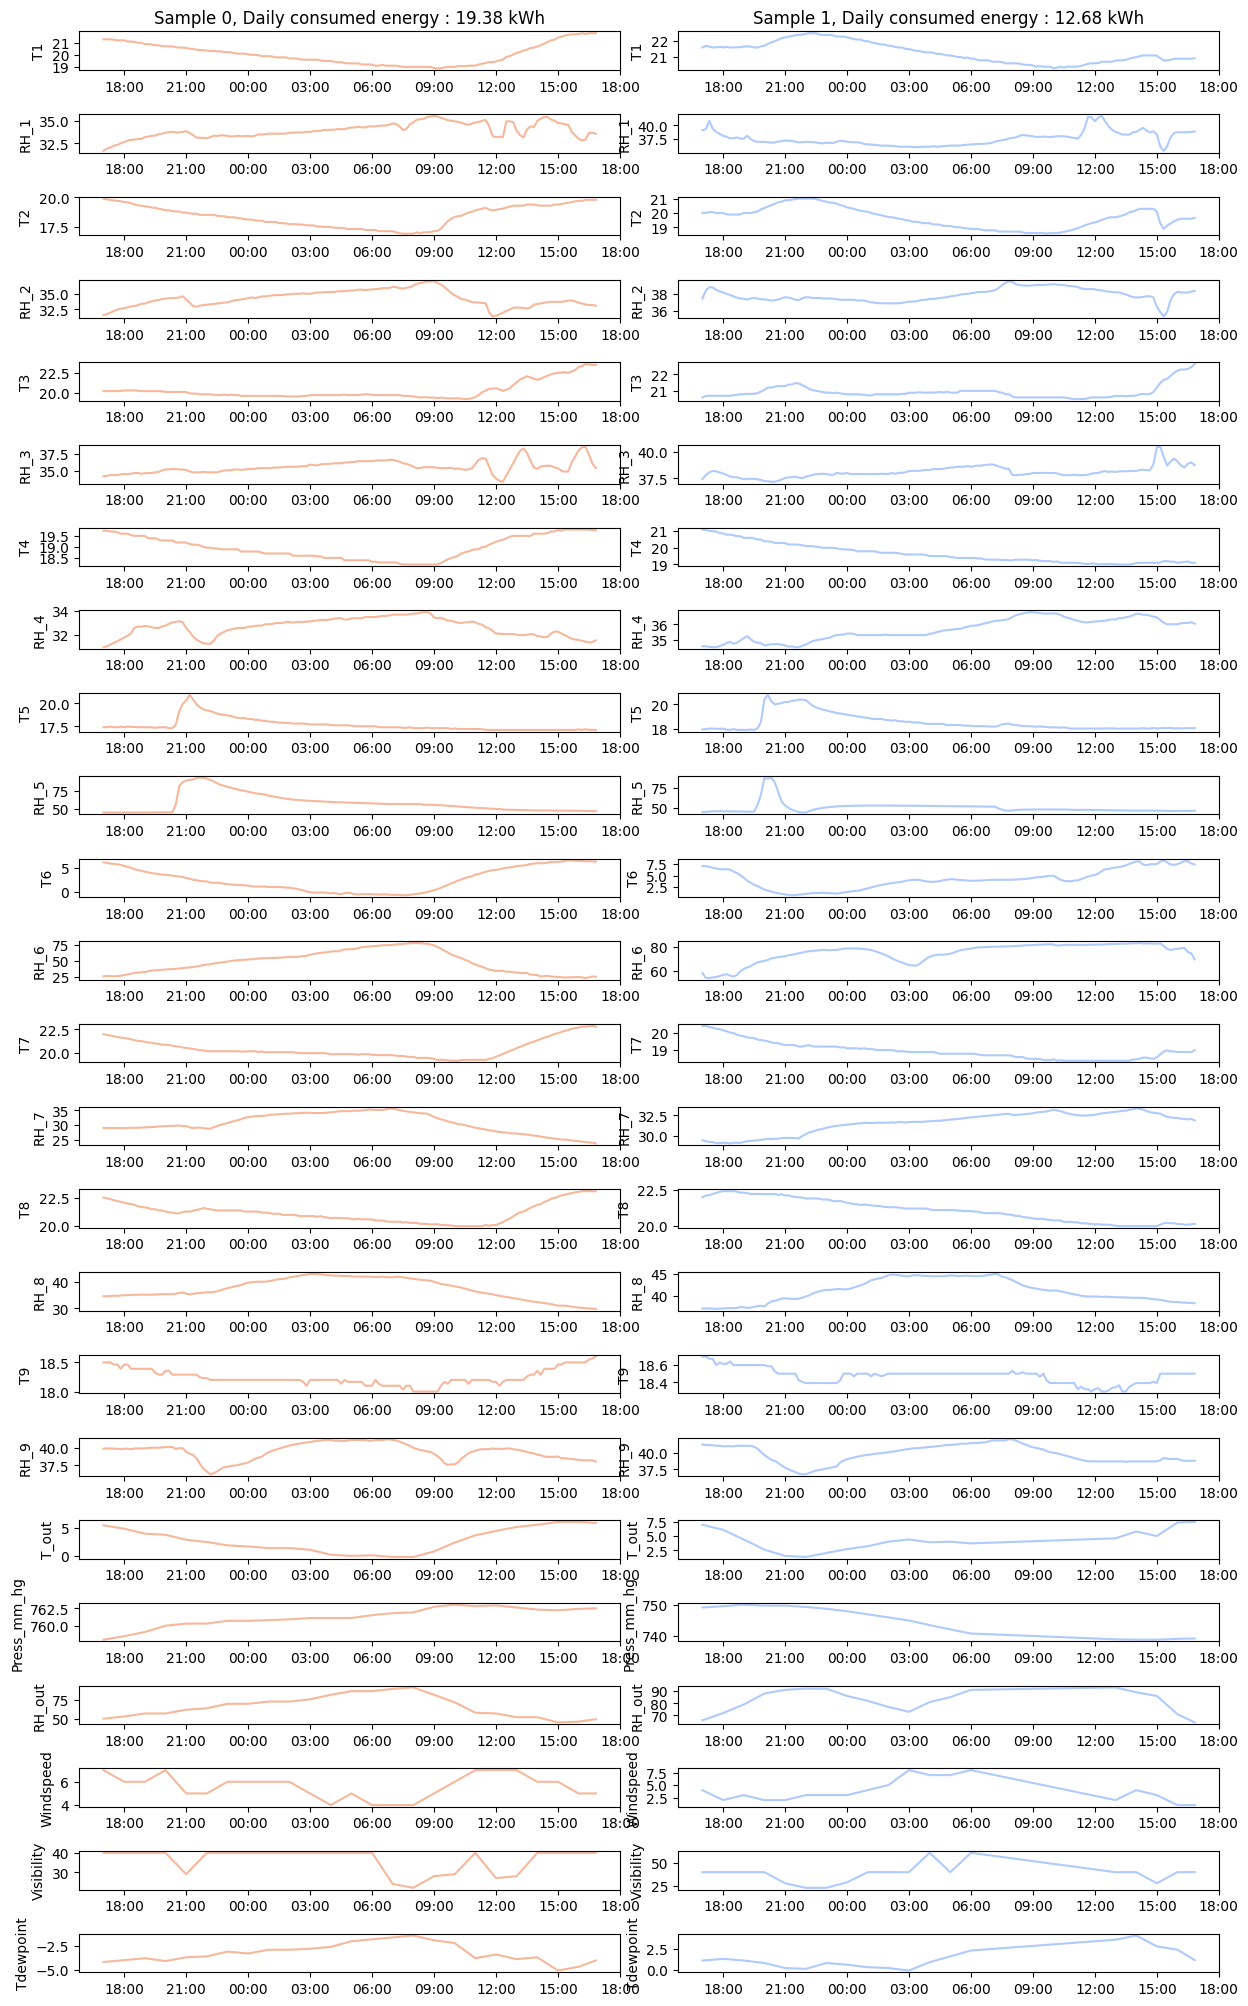

In [101]:
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm


#First row in our trainset, a multivariate time series of 24 dimensions
samples = X_train.iloc[:2]


# Normalize y_train to a 0-1 scale
norm = mcolors.Normalize(vmin=min(y_train), vmax=max(y_train))

# Choose a colormap
cmap = cm.coolwarm #the cooler the color, the less energy consumed

fig, axes = plt.subplots(nrows=24, ncols=2, figsize=(12,20))
fig.tight_layout(w_pad=2)

for (j,sample) in list(samples.iterrows()):
    color = cmap(norm(y_train[j]))

    for i in range(24):
        axes[i,j].plot(sample[i],color=color)
        axes[i,j].set_ylabel(columns[i])
        axes[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axes[0,j].set_title(f'Sample {j}, Daily consumed energy : {y_train[j]} kWh')

In [91]:
data.insert(0,'start_recording',data['T1'].apply(lambda x:x.index[0]))
data.insert(1,'end_recording',data['T1'].apply(lambda x:x.index[-1]))

In [92]:
data.head(1)

,start_recording,end_recording,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-02-28 17:00:00,2016-02-29 16:50:00,2016-02-28 17:00:00 21.29 2016-02-28 17:10:...,2016-02-28 17:00:00 31.666667 2016-02-28 17...,2016-02-28 17:00:00 19.890000 2016-02-28 17...,2016-02-28 17:00:00 31.566667 2016-02-28 17...,2016-02-28 17:00:00 20.200000 2016-02-28 17...,2016-02-28 17:00:00 34.230000 2016-02-28 17...,2016-02-28 17:00:00 19.730000 2016-02-28 17...,2016-02-28 17:00:00 31.000000 2016-02-28 17...,...,2016-02-28 17:00:00 22.533333 2016-02-28 17...,2016-02-28 17:00:00 34.590000 2016-02-28 17...,2016-02-28 17:00:00 18.500000 2016-02-28 17...,2016-02-28 17:00:00 39.863333 2016-02-28 17...,2016-02-28 17:00:00 5.500000 2016-02-28 17:...,2016-02-28 17:00:00 758.000000 2016-02-28 1...,2016-02-28 17:00:00 50.000000 2016-02-28 17...,2016-02-28 17:00:00 7.000000 2016-02-28 17:...,2016-02-28 17:00:00 40.0 2016-02-28 17:10:0...,2016-02-28 17:00:00 -4.200000 2016-02-28 17:...


In [93]:
data.start_recording[0].month

2

In [94]:
#creating new features
data['month'] = data.end_recording.apply(lambda x:x.month)
data['weekday'] = data.end_recording.apply(lambda x:x.weekday)
data['hour'] = data.end_recording.apply(lambda x:x.hour)
data['day'] = data.end_recording.apply(lambda x:x.day)
data['day_of_week'] = data.end_recording.apply(lambda x:x.dayofweek)

In [95]:
data['y_train']=y_train

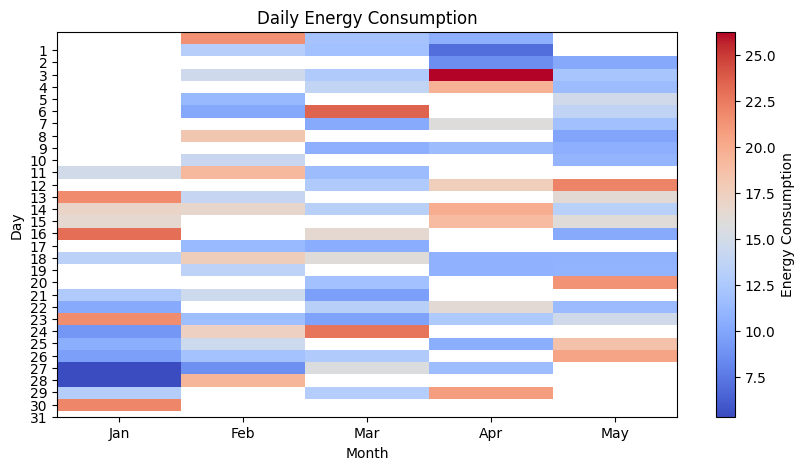

In [99]:
# Create a pivot table to aggregate the daily energy consumption
daily_energy = data.pivot_table(values='y_train', index='day', columns='month')

# Create a heatmap using the pivot table
plt.figure(figsize=(10, 5))
plt.title('Daily Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Day')
plt.imshow(daily_energy, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Energy Consumption')
plt.xticks(range(0,5), ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.yticks(range(1, 32))
plt.show()


# Feature extraction : TSFEL

## Testing custom feature

In [20]:
#Custom feature : is_it_weekend
cfg_custom = tsfel.get_features_by_domain(json_path='custom_code/features.json')
# cfg_custom['temporal']['is_it_weekend']
cfg_custom = {'temporal':{'is_it_weekend':cfg_custom['temporal']['is_it_weekend']}}

In [21]:
cfg_custom

{'temporal': {'is_it_weekend': {'complexity': 'constant',
   'description': '',
   'function': 'is_it_weekend',
   'parameters': {'parameters': None},
   'use': 'yes'}}}

In [22]:
tsfel.time_series_features_extractor(cfg_custom, X_train.iloc[5, 0], fs=fs, features_path='C:\\Users\\TRETEC\\Documents\\MVA\\S1\\[AST]\\TSFEL_Review\\custom_code\\custom_feature.py')

*** Feature extraction started ***



*** Feature extraction finished ***


,0_is_it_weekend
0,0


Good news is our custom feature has been successfully added. Bad news is tsfel isnt very flexible regarding input data format and feature calculation : 
1. time series that get fed to ``tsfel.time_series_features_extractor`` are automatically converted to np.array, allowing only to store time_series values but not corresponding time index, which could sometimes helpful, for extracting seasonal features. 
2. window_size argument in ``tsfel.time_series_features_extractor`` is in fact related to the samples dimension and not the temporal dimension, this is to be used when we classify segments of a time series. 

We also notice that it is somewhat laborious to extract a single specific feature (there is no options to *directly* extract features `by_id`, only in groups)

## TSFEL built-in features

In [23]:
# Get the TSFEL feature configuration
import pandas as pd
cfg = tsfel.get_features_by_domain()

In [ ]:
# Extract features for each variable and concatenate them
X_train_features = []
for dim in tqdm(range(X_train.shape[1])): #iterate over dimensions
    temp_features = tsfel.time_series_features_extractor(cfg, [X_train.iloc[i, dim] for i in range(X_train.shape[0])], fs=fs)
    X_train_features.append(temp_features)

X_train_features = pd.concat(X_train_features, axis=1)
X_train_features

In [ ]:
X_test_features = []
for dim in tqdm(range(X_test.shape[1])): #iterate over dimensions
    temp_features = tsfel.time_series_features_extractor(cfg, [X_test.iloc[i, dim] for i in range(X_test.shape[0])], fs=fs)
    X_test_features.append(temp_features)

X_test_features = pd.concat(X_test_features, axis=1)
X_test_features

In [26]:
# find columns where train_features contains NaN values
nan_columns = X_train_features.columns[X_train_features.isna().any()].tolist()
X_train_features.drop(nan_columns, axis=1, inplace=True)

In [27]:
X_test_features.drop(nan_columns, axis=1, inplace=True)

In [28]:
X_train_features.shape

(95, 4896)

In [29]:
zero_std_features = X_train_features.columns[X_train_features.std() ==0]
num_zero_std_features = len(zero_std_features)

print(f"Number of features with standard deviation equal to zero: {num_zero_std_features}")
print("Features with standard deviation equal to zero:")
print(zero_std_features)

Number of features with standard deviation equal to zero: 480
Features with standard deviation equal to zero:
Index(['0_ECDF_0', '0_ECDF_1', '0_ECDF_3', '0_ECDF_4', '0_ECDF_7', '0_ECDF_8',
       '0_ECDF_9', '0_Histogram_0', '0_Histogram_1', '0_Histogram_2',
       ...
       '0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1', '0_ECDF_0',
       '0_ECDF_1', '0_ECDF_3', '0_ECDF_4', '0_ECDF_7', '0_ECDF_8', '0_ECDF_9',
       '0_Human range energy'],
      dtype='object', length=480)


In [30]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

# Remove low variance features
selector = VarianceThreshold()
X_train_features_selected = selector.fit_transform(X_train_features)

In [31]:
X_test_features_selected = pd.DataFrame(selector.transform(X_test_features))

In [32]:
X_train_features_selected=pd.DataFrame(X_train_features_selected,)
print(X_train_features_selected.shape)
corr_features = tsfel.correlated_features(X_train_features_selected)
len(corr_features)

(95, 4344)


1823

In [33]:
# Highly correlated features are removed
# X_train_features_selected.drop(corr_features, axis=1, inplace=True)
# X_test_features_selected.drop(corr_features, axis=1, inplace=True)


# Normalising Features
scaler = preprocessing.MinMaxScaler()
nX_train_features_selected = pd.DataFrame(scaler.fit_transform(X_train_features_selected))
nX_test_features_selected = pd.DataFrame(scaler.transform(X_test_features_selected))

In [34]:
nX_train_features_selected.shape

(95, 4344)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(nX_train_features_selected, y_train)

# Make predictions on the test set and evaluate the model
y_pred = regressor.predict(nX_test_features_selected)
mse = mean_squared_error(y_test, y_pred)

# Results
mse

4.971311249761898

0.8673747132631574

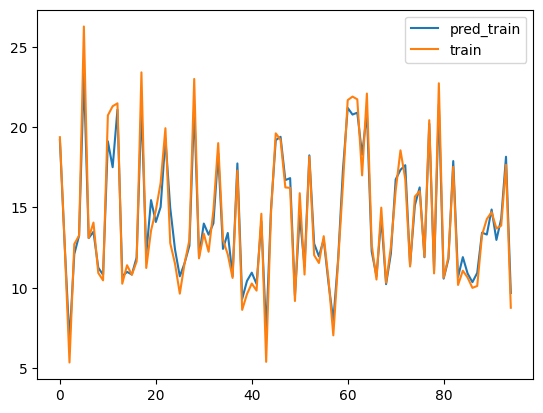

In [38]:
y_pred_train = regressor.predict(nX_train_features_selected)
plt.plot(y_pred_train, label = 'pred_train')
plt.plot(y_train, label='train')
plt.legend()
mse = mean_squared_error(y_train, y_pred_train)
mse

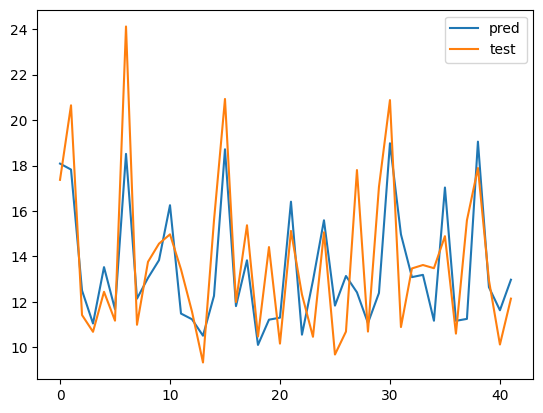

In [40]:
plt.plot(y_pred, label = 'pred')
plt.plot(y_test, label='test')
plt.legend()

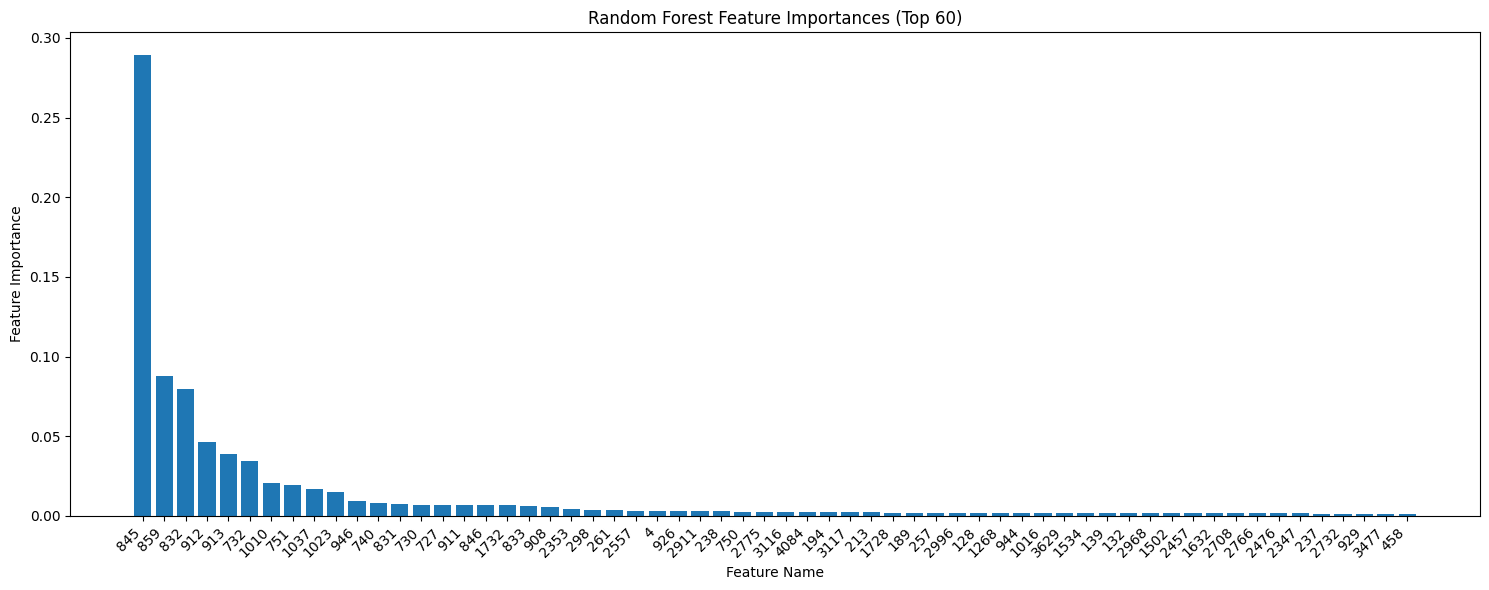

In [60]:

feature_names = nX_train_features_selected.columns.tolist()
feature_importances = regressor.feature_importances_

# Sort indices based on feature importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances with feature names
# Plotting the feature importances for the first 60 features
plt.figure(figsize=(15, 6))
plt.bar(range(60), feature_importances[indices][:60], align="center")
plt.xticks(range(60), [feature_names[i] for i in indices][:60], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances (Top 60)")
plt.tight_layout()
plt.show()

In [61]:
features=[feature_names[i] for i in indices][:5]

In [ ]:
%pip install xgboost

In [58]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.5, 0.7, 1],
    'alpha': [0, 0.1, 0.5, 1]
}
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')

random_search = RandomizedSearchCV(xgb_reg, param_distributions=param_dist, 
                                   n_iter=25, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, random_state=42)

x_train_post_RF = nX_train_features_selected
x_test_post_RF = nX_test_features_selected

random_search.fit(x_train_post_RF, y_train)

# Make predictions on the test set and evaluate the random_search
y_pred = random_search.predict(x_test_post_RF)
mse = mean_squared_error(y_test, y_pred)

# Results
mse

Fitting 3 folds for each of 25 candidates, totalling 75 fits


4.182108440849038

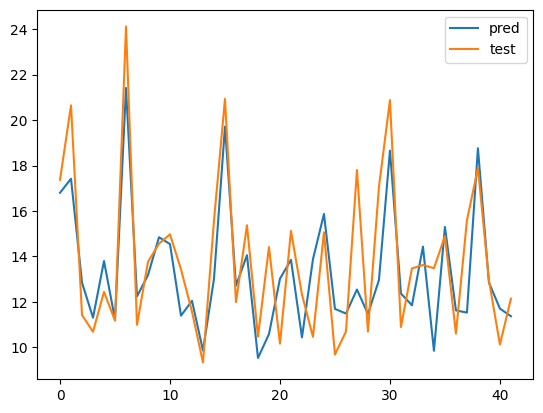

In [59]:
plt.plot(y_pred, label = 'pred')
plt.plot(y_test, label='test')
plt.legend()

## Handcrafting features
 